# Analysis of economic indicators of G20 countries.
## 1. Importing Libraries and Loading Data.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import opendatasets as od
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from utils import clustering as cl

In [ ]:
download_site = "https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data"

In [ ]:
# Setting the working directory
try:
    os.makedirs("datasets/countries", exist_ok=True)
except FileExistsError:
    pass

In [ ]:
# od.download(download_site, "./datasets/countries", force=True)


In [ ]:
filepath = "/work/datasets/countries/unsupervised-learning-on-country-data/Country-data.csv"
df = pd.read_csv(filepath)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 1.1 Data Cleaning

Gliding over missing values and duplicates.

In [ ]:
print(f"Total number of missing values: \n {df.isna().sum()}")

Total number of missing values: 
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


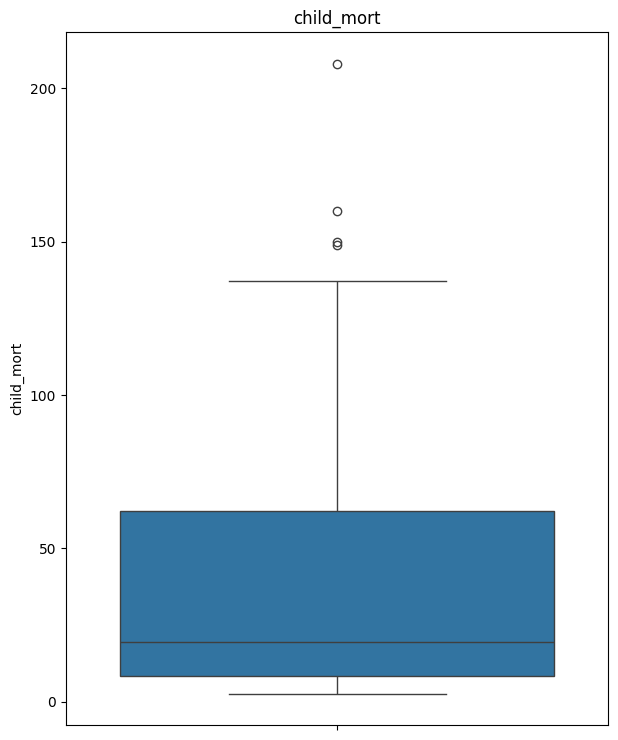

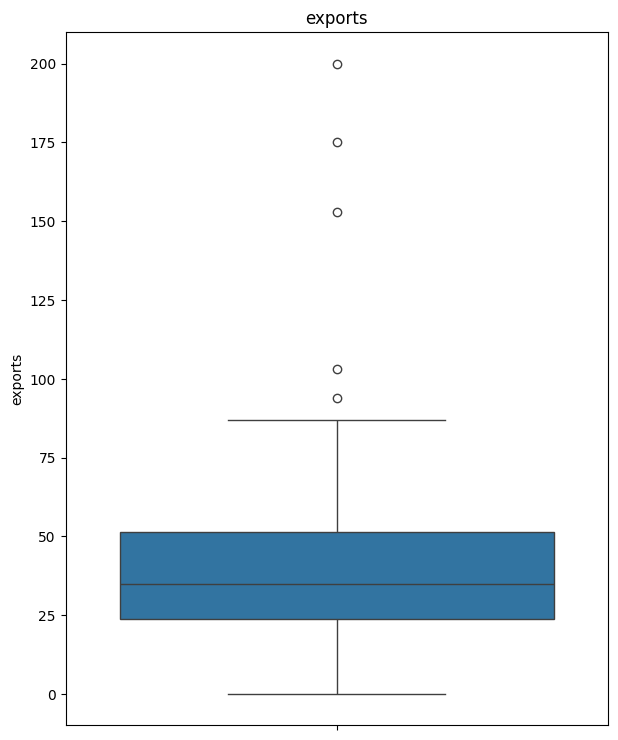

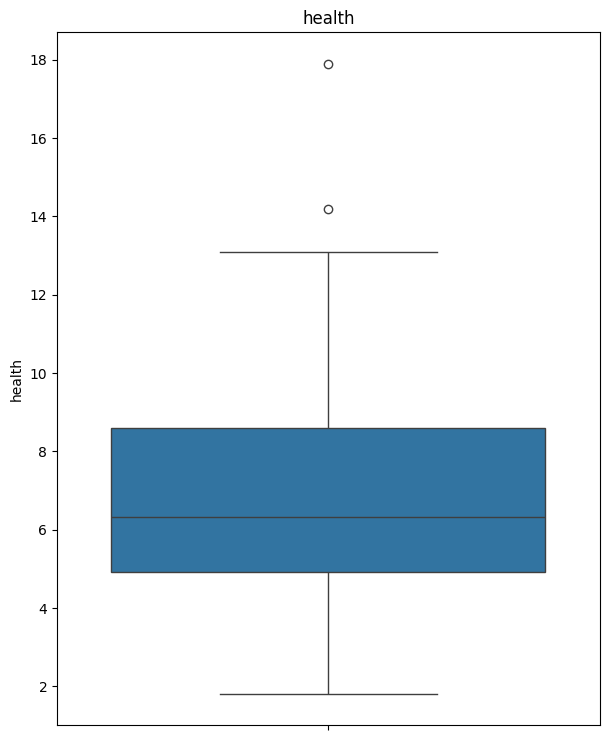

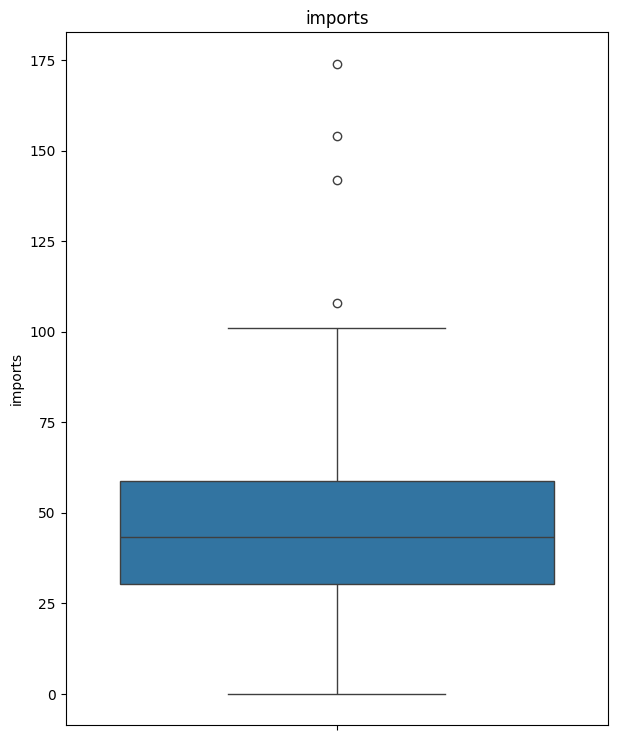

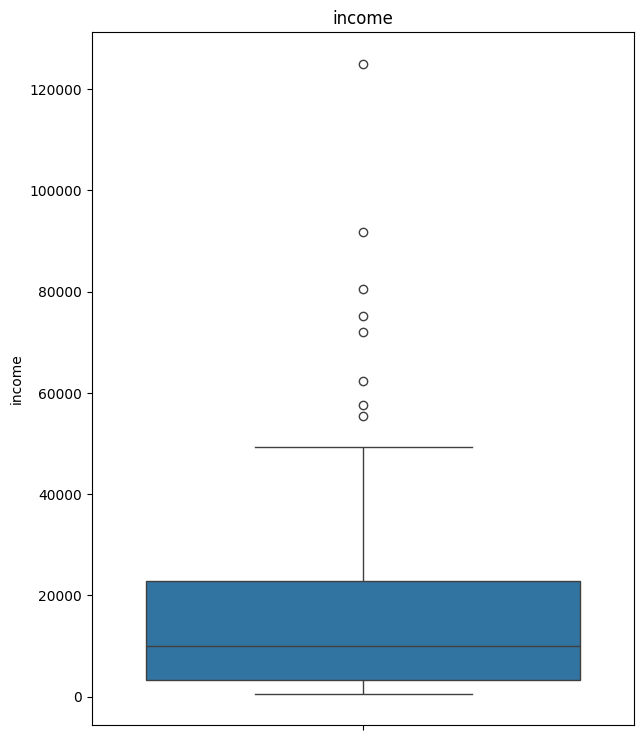

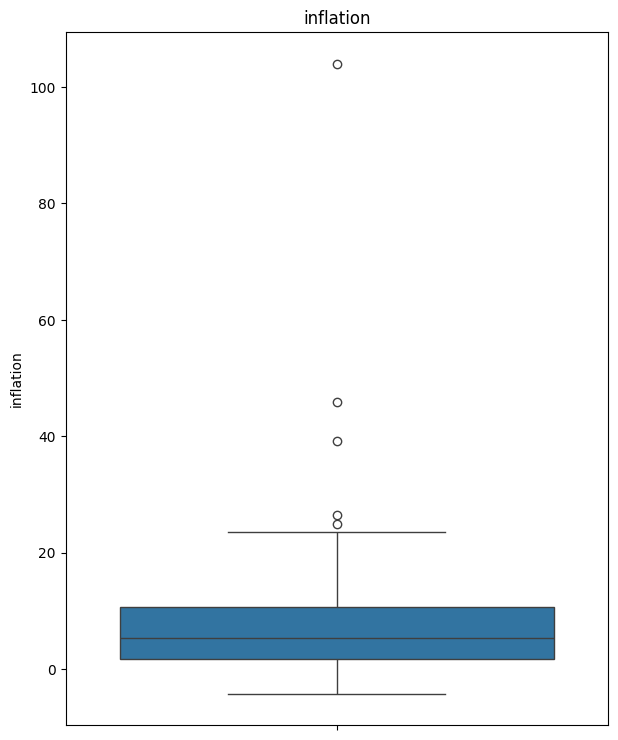

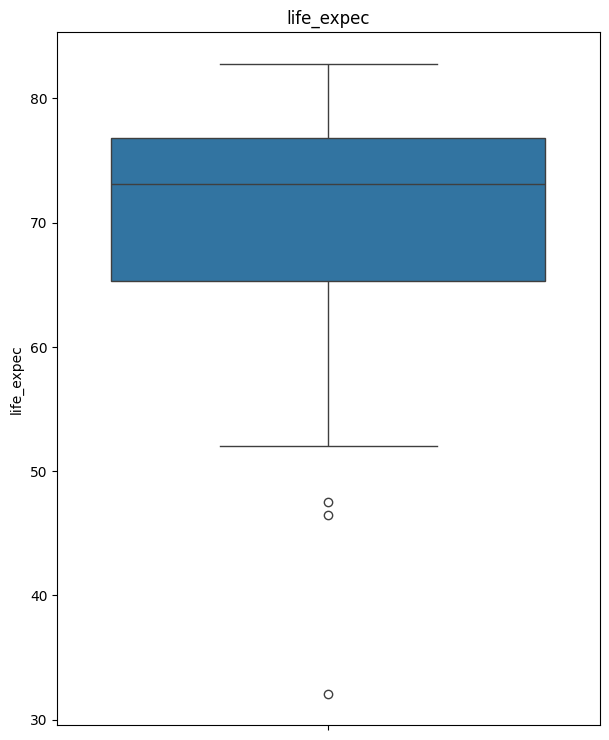

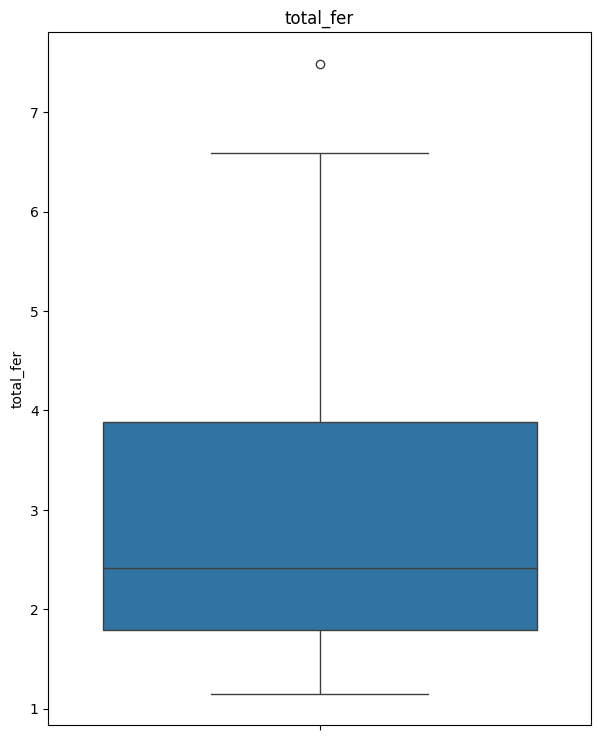

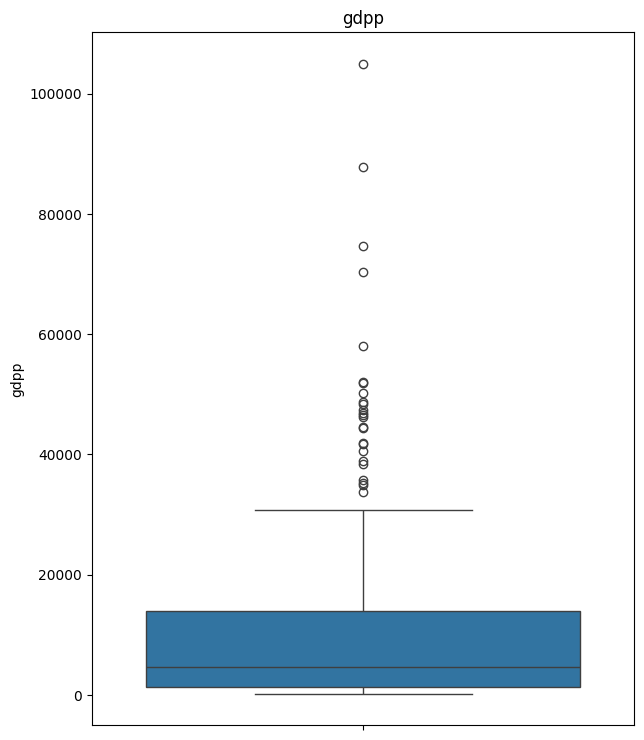

In [ ]:
for _ in df.select_dtypes(exclude="object").columns:
    plt.figure(figsize=(7,9))
    sns.boxplot(data=df, y=_, showfliers=True)
    plt.title(_)
    plt.show()

Outliers coming from `gdpp`, `inflation`, and `income` are found within real data and not from large deviations from the mean.

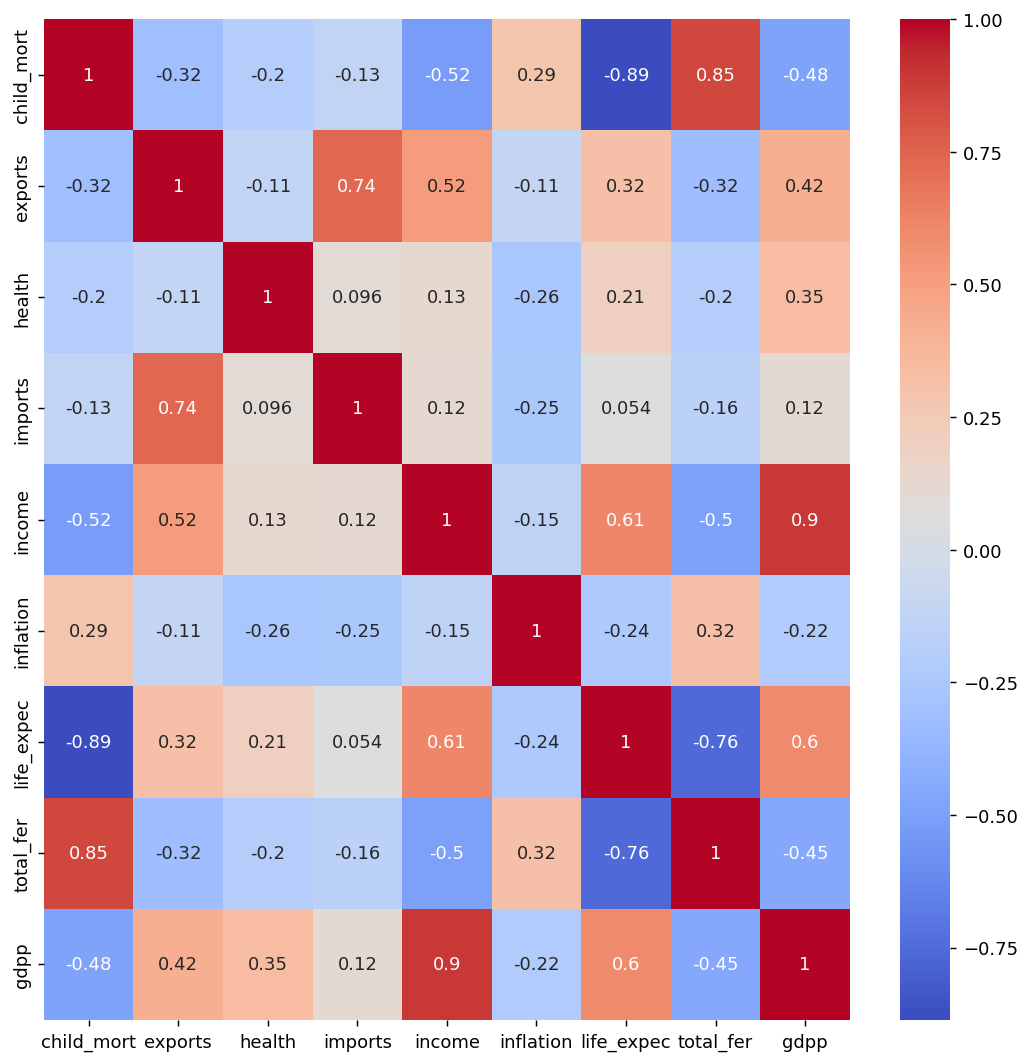

In [ ]:
fig = plt.figure(figsize=(10, 10), dpi=130)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## 1.2 Scaling data

In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df.drop("country", axis=1))
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## 2. Principal Component Analysis (PCA)

In [ ]:
pca = PCA()
pca.fit(df_scaled) # Fitting data to PCA with None as n_components
pca_data_scaled = pca.transform(df_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [ ]:
pca_data_scaled.shape, df_scaled.shape

((167, 9), (167, 9))

In [ ]:
# Evaluating explained variance
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [ ]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


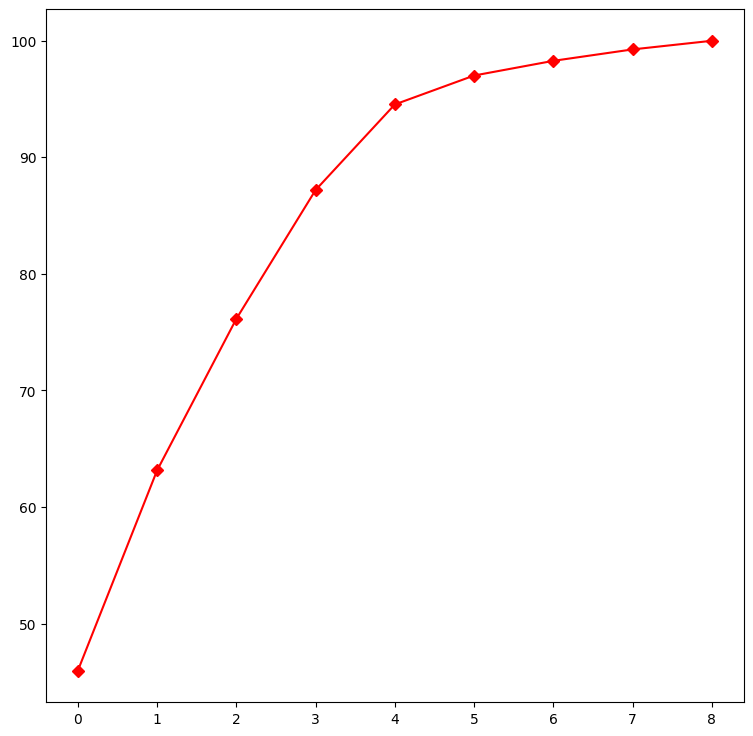

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(cum_var, "r-D")
plt.show()

In [ ]:
# Variance is captured by 4 principal components, up to 87.2%.
pca_data_standard = pd.DataFrame(
    pca_data_scaled
)

pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## 3. Clustering 

### 3.1 K-Means

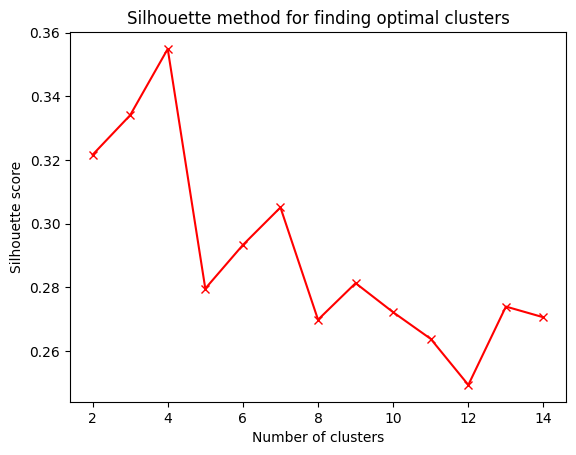

In [ ]:
cl.silhouette_method(data=pca_data_standard, cols=pca_data_standard.columns)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1325: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


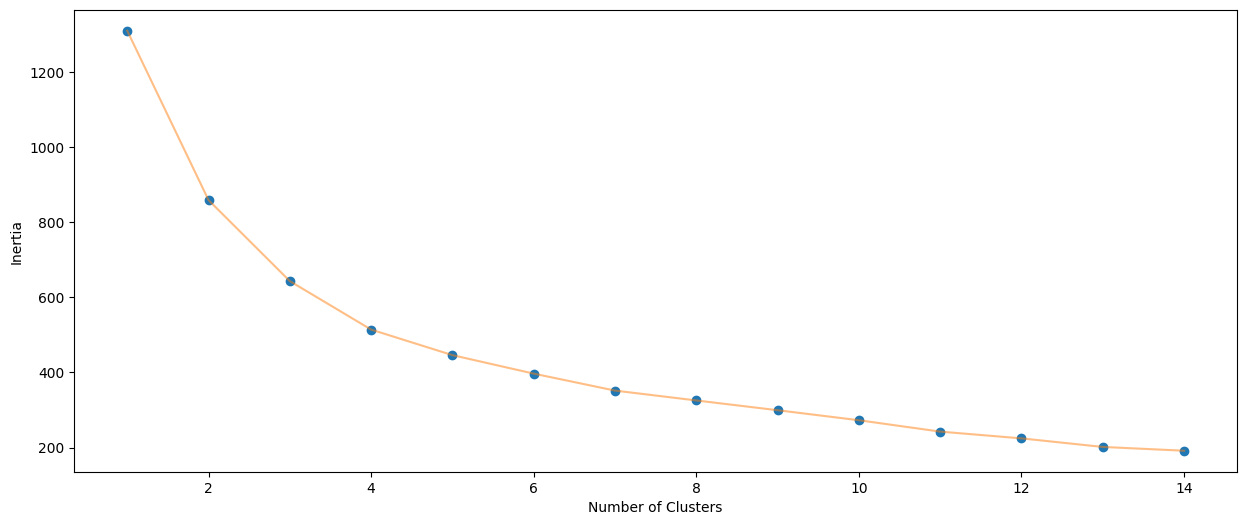

In [ ]:
cl.elbow_plot(data=pca_data_standard, n=15, cols=pca_data_standard.columns)

In [ ]:
km = KMeans(
    n_clusters=4,
    max_iter=300,
    random_state=42,
    tol=0.0001
)

y = km.fit_predict(pca_data_standard)
df["kmeans_pca"] = y

In [ ]:
print(f"Silhouette score for K-Means: {silhouette_score(pca_data_standard, y)}")

Silhouette score for K-Means: 0.34930392685434875


### 3.2 Hierarchical Clustering


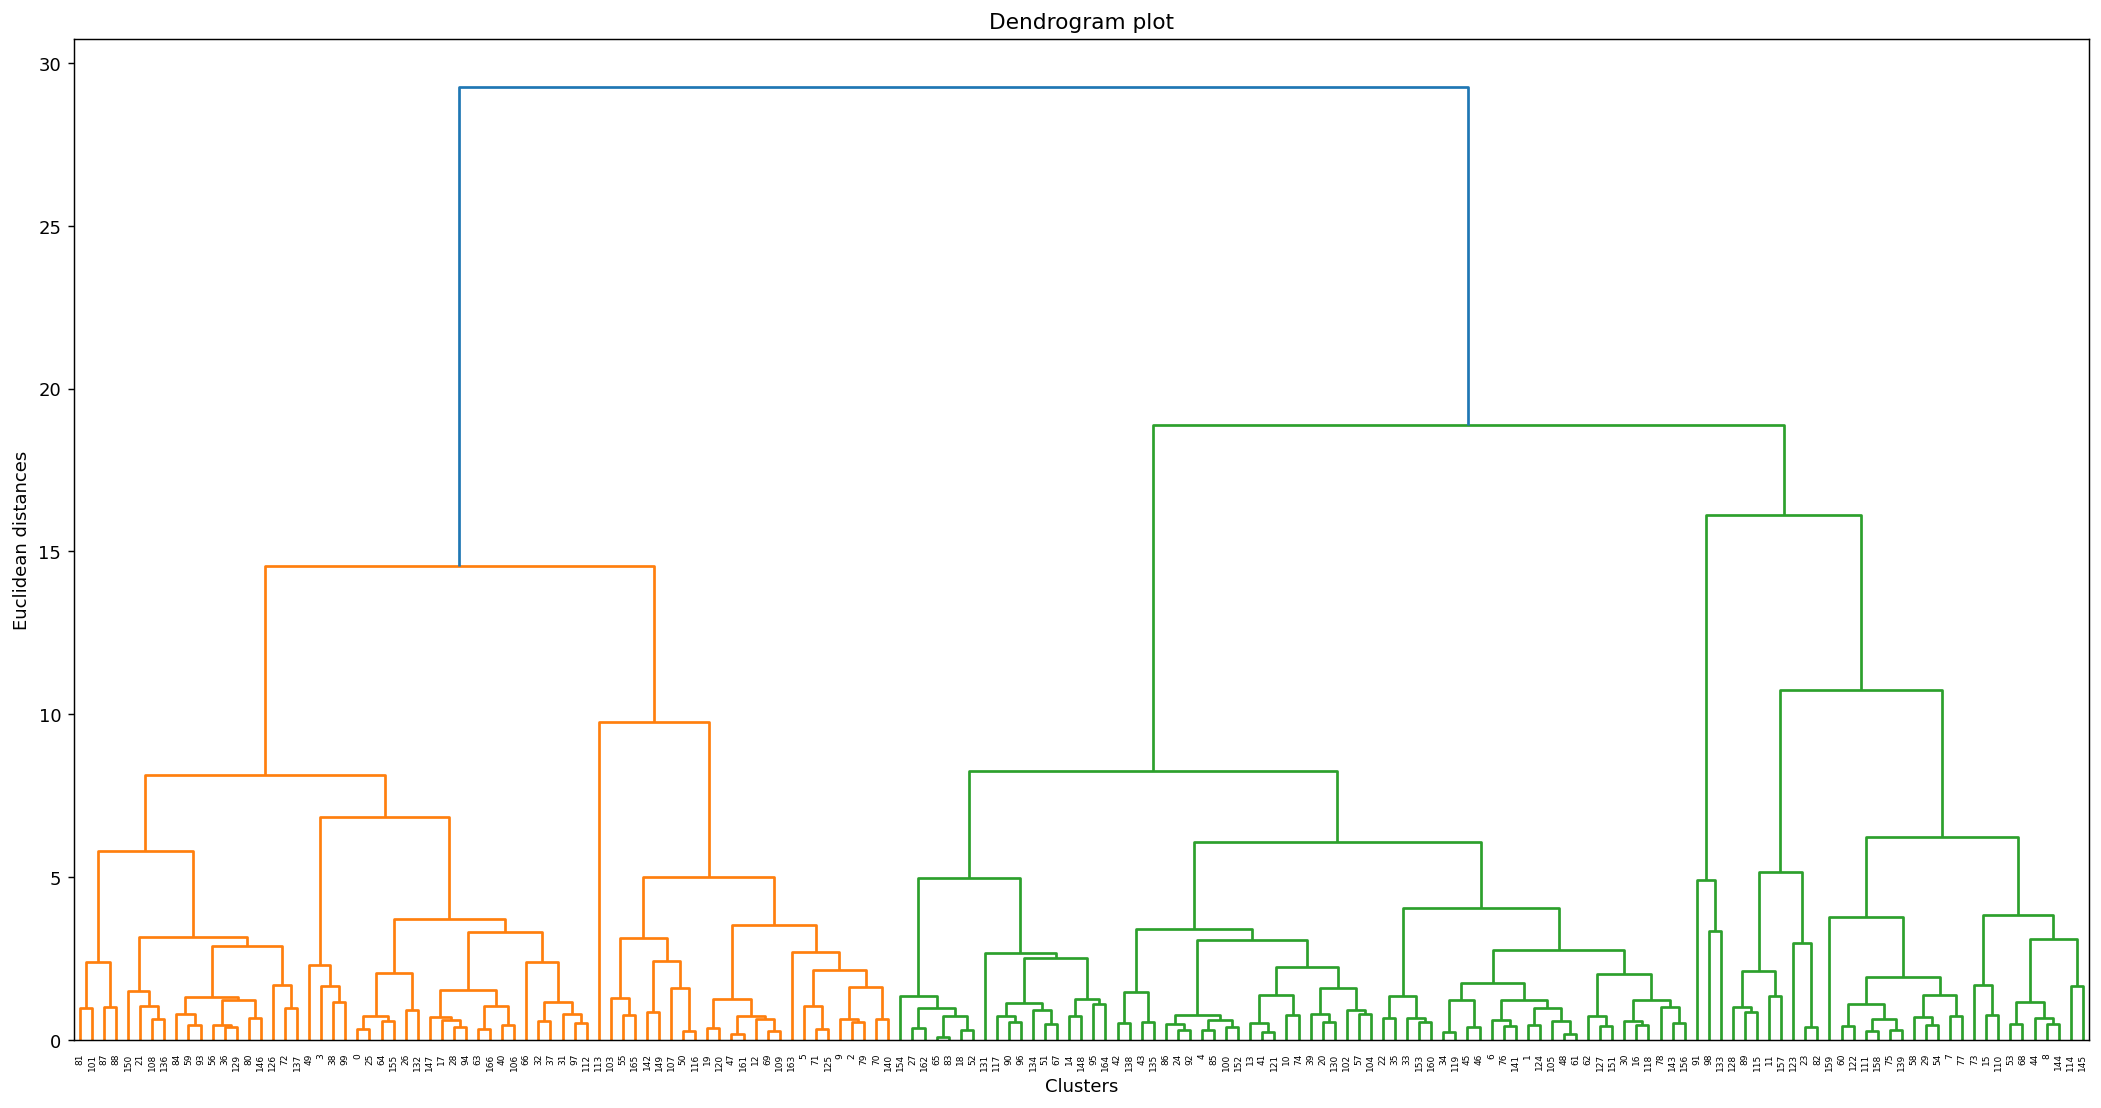

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
dendrogram_plot = dendrogram(linkage(pca_data_standard, method="ward"))
plt.title("Dendrogram plot")
plt.xlabel("Clusters")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df["hierarchical_pca"] = y_hc

0.28769961762228


### 3.3 DBSCAN

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distance, indices = neighbors_fit.kneighbors(pca_data_standard)

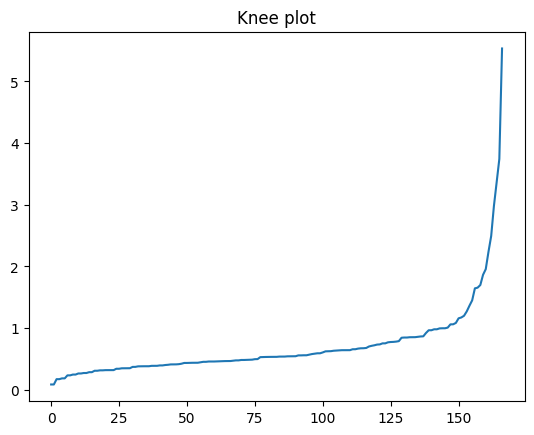

In [ ]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)
plt.title("Knee plot")
plt.show()

In [ ]:
eps_value = np.arange(0.5, 2, 0.1)
min_samples = np.arange(3, 12)
print(eps_value.shape, min_samples.shape)

(15,) (9,)


In [ ]:
from itertools import product
dbscan_params = list(product(eps_value, min_samples))

In [ ]:
no_of_clusters = []
sil_scores = []
for p in dbscan_params:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_dbscan = dbscan.fit_predict(pca_data_standard)
    try:
        no_of_clusters.append(len(np.unique(y_dbscan)))
        sil_scores.append(silhouette_score(pca_data_standard, y_dbscan))
    except ValueError:
        sil_scores.append(0)

In [ ]:
df_param_tunning = pd.DataFrame.from_records(
    dbscan_params,
    columns=["eps", "min_samples"]
)

df_param_tunning["sil_scores"] = sil_scores
df_param_tunning["n_clusters"] = no_of_clusters

In [ ]:
pivot_1 = pd.pivot_table(
    data=df_param_tunning,
    values="sil_scores",
    index="min_samples",
    columns="eps"
)

pivot_1

eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
min_samples,,,,,,,,,,,,,,,
3,-0.290614,-0.153373,-0.183408,-0.133920,-0.165125,0.006072,0.186189,0.185912,0.182938,0.435390,0.466650,0.466650,0.501720,0.501720,0.528639
4,-0.346912,-0.189326,-0.012194,-0.077514,0.161053,0.260563,0.016793,0.369502,0.376351,0.414154,0.446651,0.456327,0.485375,0.501720,0.528639
5,-0.270847,-0.213258,-0.066452,0.109937,0.153633,0.238618,0.282165,0.365245,0.376351,0.391547,0.414150,0.418132,0.454578,0.501720,0.528639
6,-0.270847,-0.204080,-0.109615,-0.003871,0.151308,0.238618,0.263004,0.335010,0.370932,0.391547,0.414150,0.414150,0.450920,0.485375,0.508155
7,-0.192021,-0.171223,-0.075077,-0.035975,0.132667,0.216703,0.250278,0.316032,0.331954,0.380646,0.408000,0.414150,0.425911,0.454760,0.508155
8,0.000000,0.000000,-0.176120,0.026053,0.179129,0.155875,0.230785,0.298381,0.331954,0.358191,0.408000,0.414150,0.425911,0.444284,0.508155
9,0.000000,0.000000,-0.151907,-0.023622,0.169364,0.146560,0.218329,0.298247,0.321121,0.358191,0.408000,0.414150,0.425911,0.444284,0.508155
10,0.000000,0.000000,-0.167765,-0.042680,0.130852,0.135347,0.212390,0.298247,0.323965,0.360372,0.374445,0.414150,0.425911,0.444284,0.490310
11,0.000000,0.000000,0.000000,-0.092266,0.055138,0.153440,0.158284,0.298247,0.323965,0.348395,0.375527,0.414150,0.425911,0.437530,0.478285


In [ ]:
pivot_2 = pd.pivot_table(
    data=df_param_tunning,
    values="n_clusters",
    index="min_samples",
    columns="eps"
)

pivot_2

eps,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
min_samples,,,,,,,,,,,,,,,
3,8.0,10.0,6.0,6.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
4,8.0,7.0,5.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,3.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,3.0,3.0,6.0,6.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,1.0,1.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,1.0,1.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
10,1.0,1.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
11,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


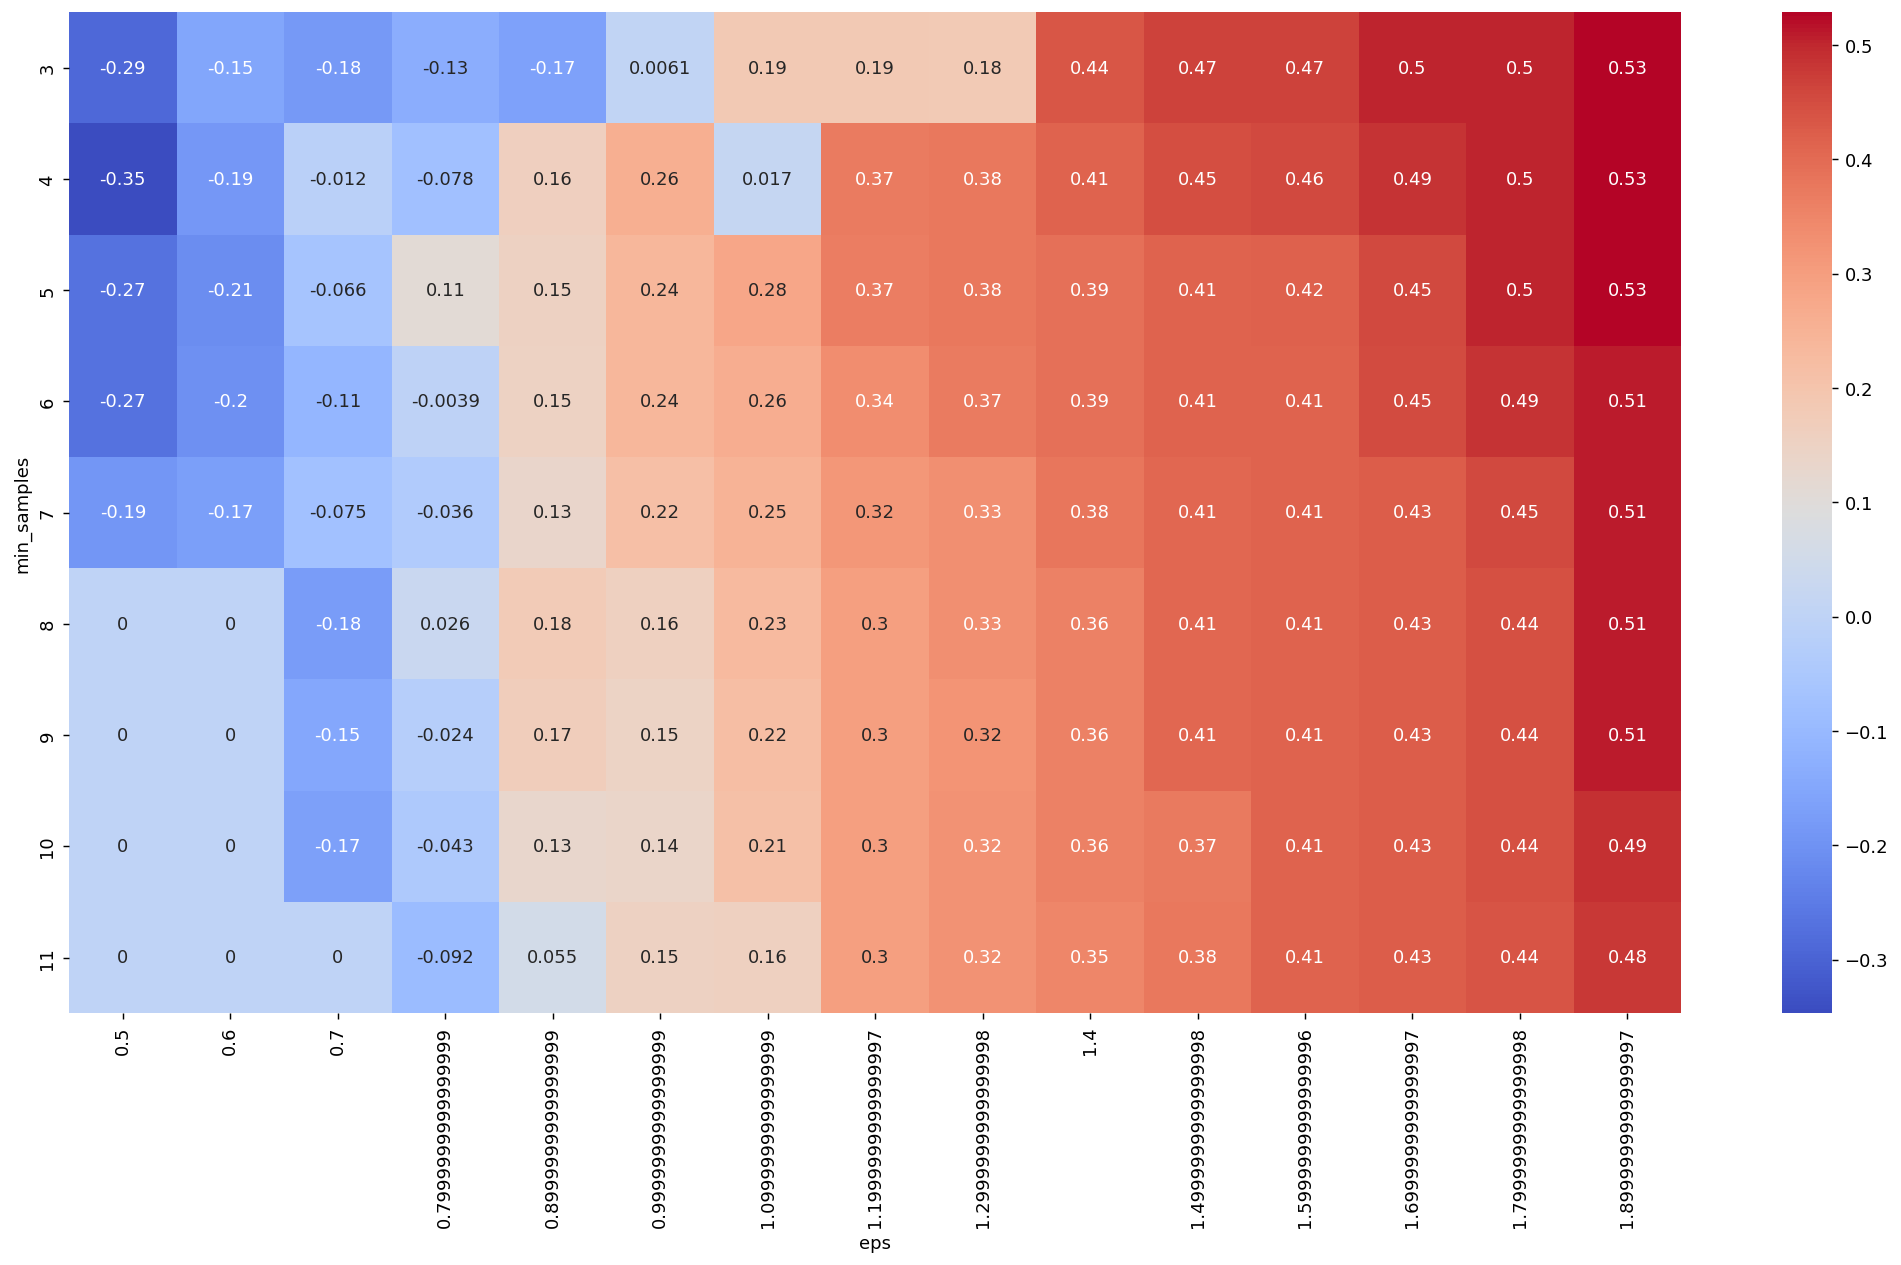

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_1, annot=True, cmap="coolwarm", annot_kws={"size":10})
plt.show()

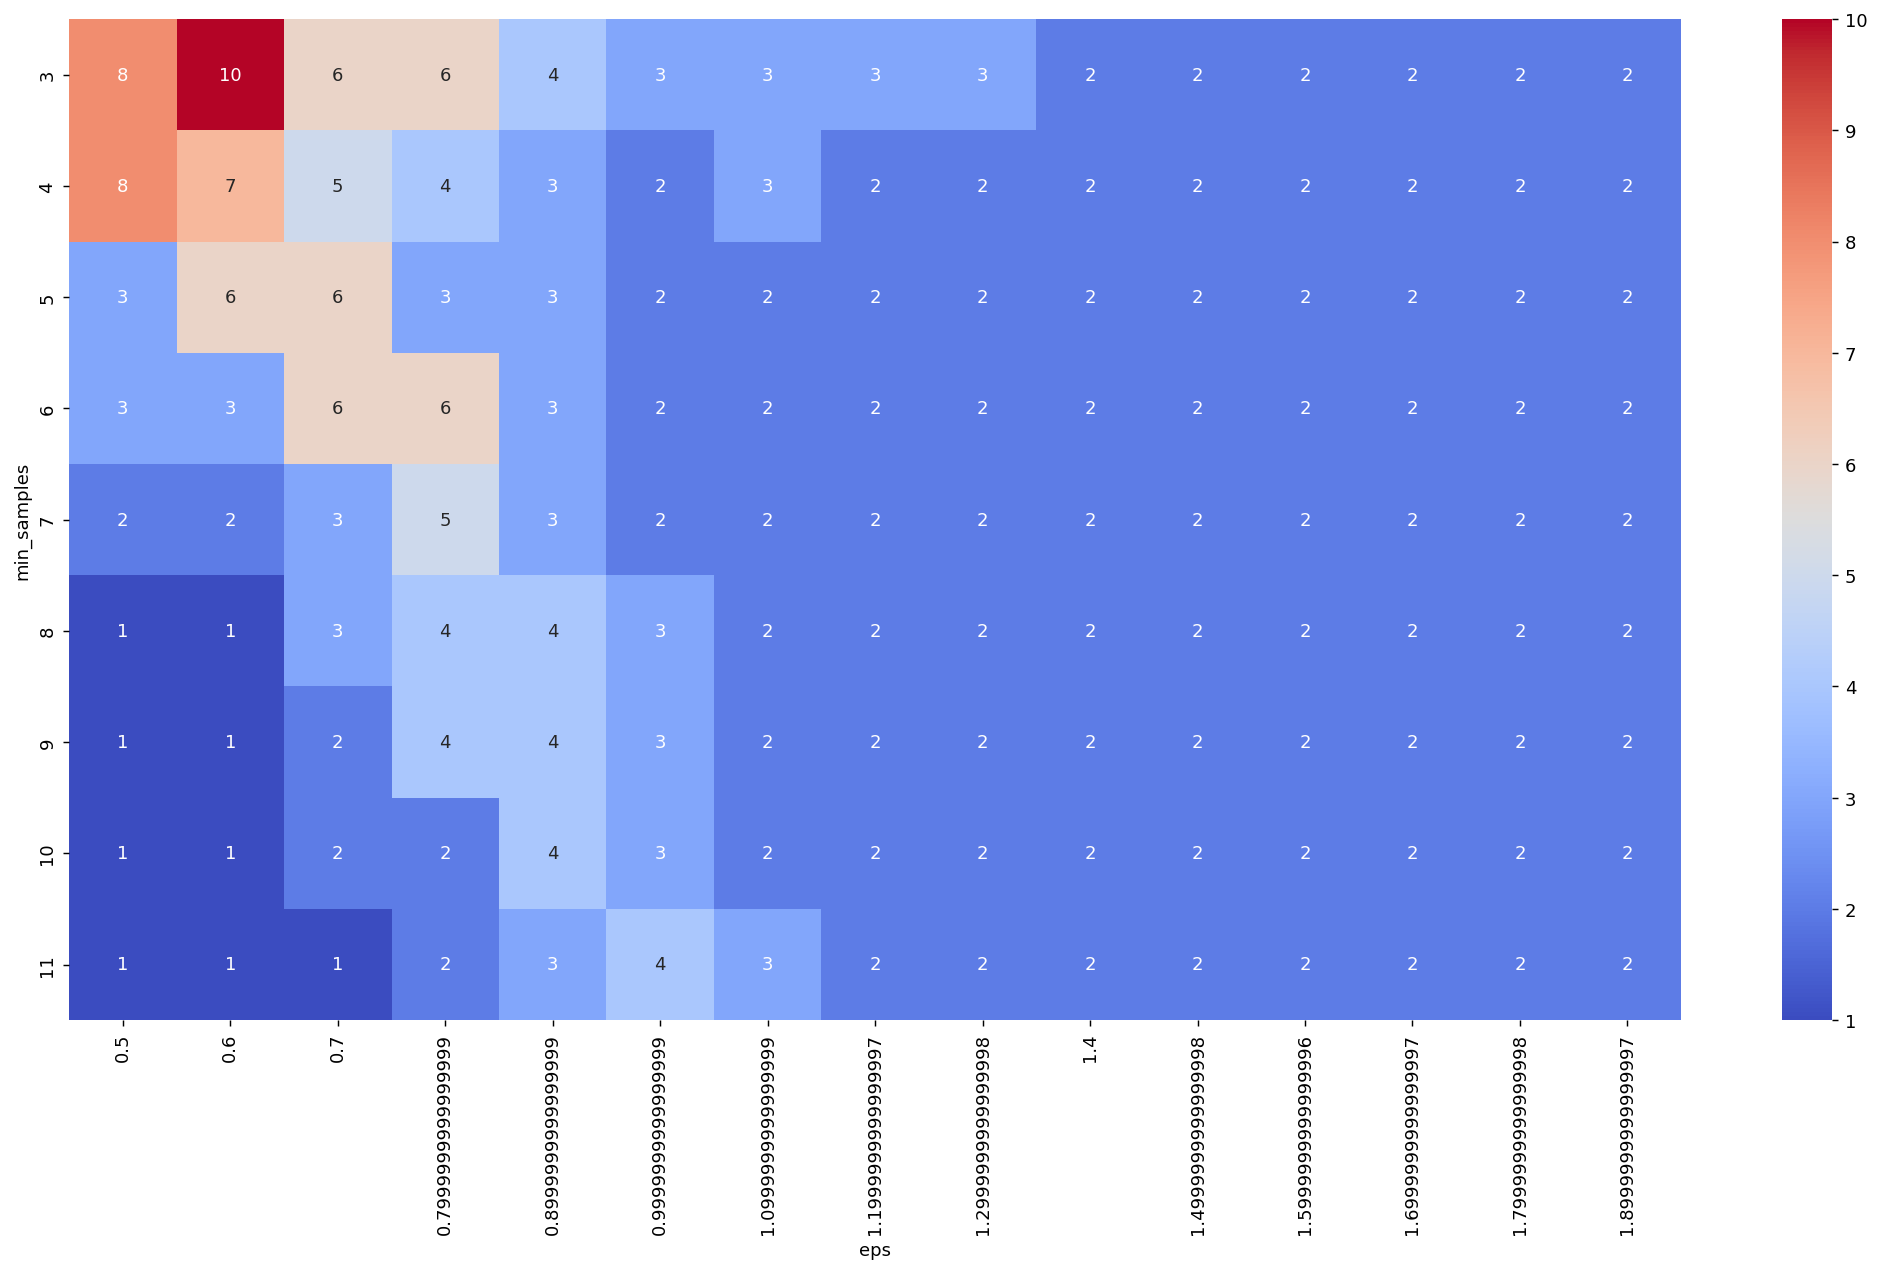

In [ ]:
plt.figure(figsize=(20,10), dpi=130)
sns.heatmap(data=pivot_2, annot=True, cmap="coolwarm", annot_kws={"size":10})
plt.show()

In [ ]:
dbs_opt = DBSCAN(eps=1.9, min_samples=3)
y_dbscan = dbs_opt.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan))
df["dbscan_pca"] = y_dbscan

0.5286385159965098


## 4. Cluster Visualization

## 4.1 K-Means

In [ ]:
columns_to_visualize = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_pca']

fig = plt.figure(figsize=(15, 10), dpi=130)
sns.pairplot(df[columns_to_visualize], hue="kmeans_pca", palette="coolwarm")
plt.show()

NameError: name 'plt' is not defined

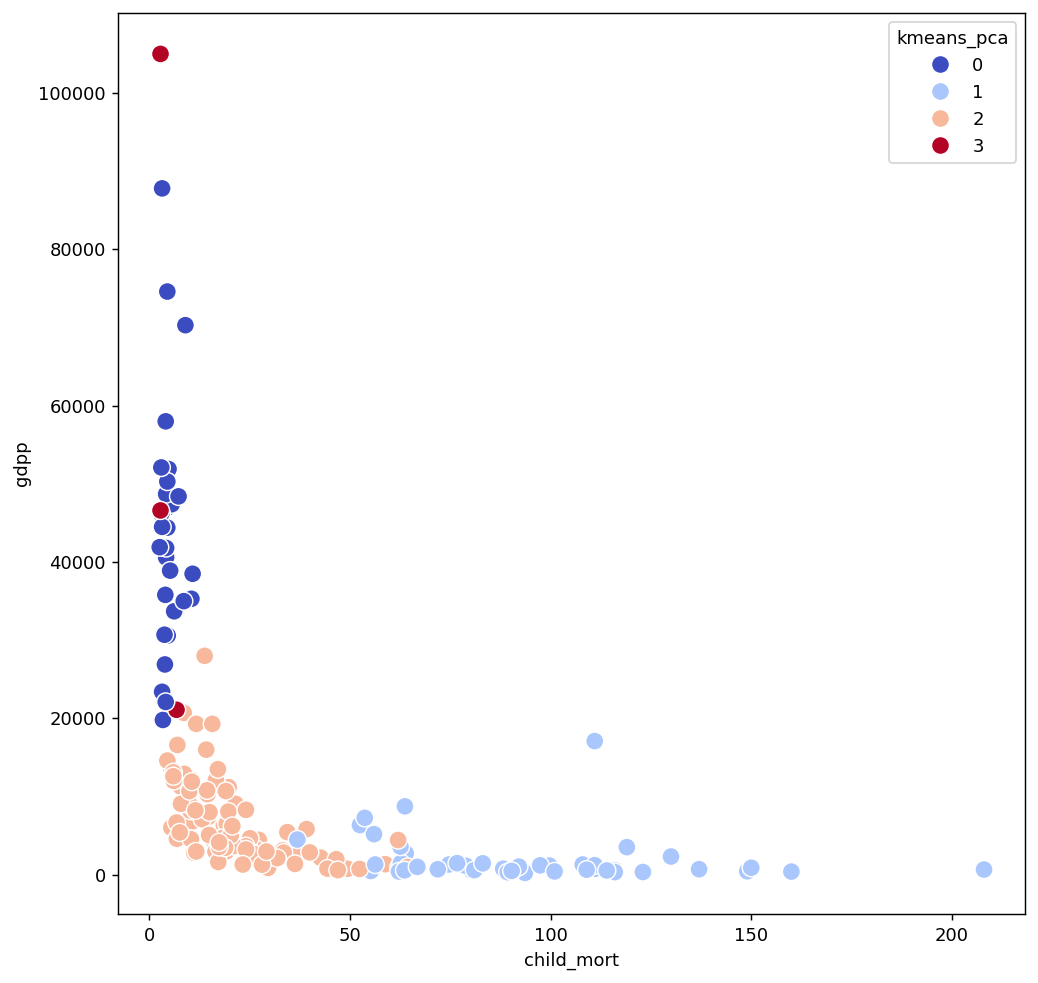

In [ ]:
fig = plt.figure(figsize=(9,9), dpi=130)
sns.scatterplot(data=df, x="child_mort", y="gdpp", hue="kmeans_pca", palette="coolwarm", s=100)
plt.show()



In [ ]:
# Outlier values in countries by gdpp
df[df["kmeans_pca"] == 3].sort_values("gdpp", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,hierarchical_pca,dbscan_pca
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,3,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,3,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,3,-1


In [ ]:
# Richest countries by gdpp
df[df["kmeans_pca"] == 0].sort_values("gdpp", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,hierarchical_pca,dbscan_pca
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,0,1,0
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,0,1,0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,0,1,-1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,1,0
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,0,1,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,1,0
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300,0,1,0
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,0,1,0
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,0,1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,1,0


In [ ]:
# Middle-income countries by gdpp
df[df["kmeans_pca"] == 2].sort_values("gdpp", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,hierarchical_pca,dbscan_pca
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,2,2,0
11,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,2,1,0
115,Oman,11.7,65.70,2.77,41.2,45300,15.600,76.1,2.90,19300,2,1,0
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300,2,1,0
134,Slovak Republic,7.0,76.30,8.79,77.8,25200,0.485,75.5,1.43,16600,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Kyrgyz Republic,29.6,51.60,6.18,81.7,2790,10.000,68.5,3.10,880,2,2,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,2,2,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,2,0,0
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,2,0,0


In [ ]:
# Low-income countries by gdpp
df[df["kmeans_pca"] == 1].sort_values("gdpp", ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,hierarchical_pca,dbscan_pca
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,1,0,-1
55,Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,1,0,0
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,0,0
108,Namibia,56.0,47.80,6.78,60.7,8460,3.560,58.6,3.60,5190,1,0,0
72,Iraq,36.9,39.40,8.41,34.1,12700,16.600,67.2,4.56,4500,1,0,0
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600,1,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0,0
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,1,0,0
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,1,0,-1


In [ ]:
!pip install pycountry

import pycountry
import plotly.express as px

def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None

df_map = df.copy()
df_map['Code'] = df['country'].apply(lambda x: get_alpha_3(x))

fig = px.choropleth(df_map, locations='Code', color='kmeans_pca', hover_name='country', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.5 MB/s eta 0:00:00


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>